In [1]:
from periodicLatticeSolver import PeriodicLatticeSolver
from minimizer import Minimizer
import numpy as np
from FloorPlanClass import FloorPlan
from plotter import Plotter
PLS = PeriodicLatticeSolver(200, .02)
PLS.add_Injector()

L1 = PLS.Variable('L1', varMin=.01, varMax=.5)
L2= PLS.Variable('L2', varMin=.01, varMax=.5)
L3 =PLS.Variable('L3', varMin=.01, varMax=.5)
L4= PLS.Variable('L4', varMin=.01, varMax=.5)

Bp1 = .45#PLS.Variable('Bp1', varMin=.1, varMax=.45)
Bp2 = .45#PLS.Variable('Bp2', varMin=.1, varMax=.45)
Bp3 = .45#PLS.Variable('Bp3', varMin=.1, varMax=.45)
Bp4 = .45#PLS.Variable('Bp4', varMin=.1, varMax=.45)

rp1 = PLS.Variable('rp1', varMin=.01, varMax=.03)
rp2 = PLS.Variable('rp2', varMin=.01, varMax=.03)
rp3 = PLS.Variable('rp3', varMin=.01, varMax=.03)
rp4 = PLS.Variable('rp4', varMin=.01, varMax=.03)

r0=PLS.Variable('r0',varMin=.9,varMax=1.1)
TL1=PLS.Variable('TL1',varMin=.5,varMax=1.5)
TL2=PLS.Variable('TL2',varMin=.5,varMax=1.5)


PLS.set_Track_Length(TL1=TL1,TL2=TL2)
PLS.begin_Lattice()

PLS.add_Bend(np.pi, r0, .45)
#PLS.add_Drift(L=.03)
PLS.add_Lens(L4, Bp4, rp4)
PLS.add_Drift()
PLS.add_Combiner()
PLS.add_Drift()
PLS.add_Lens(L1, Bp1,rp1)
#PLS.add_Drift(L=.03)
PLS.add_Bend(np.pi, r0, .45)
#PLS.add_Drift(L=.03)
PLS.add_Lens(L2, Bp2, rp2)
PLS.add_Drift()
PLS.add_Lens(L3, Bp3, rp3)
#PLS.add_Drift(L=.03)
PLS.end_Lattice()

330 180
Lattice model completed


100%|██████████| 100/100 [01:43<00:00,  1.03s/it]


minCost for each thread:  [1.88725694 1.9        1.87392133 1.9        1.87030802 1.87301866
 1.9        1.89269871 1.87005696 1.85290316 1.83816736 1.8773559
 1.88170988 1.87795354 1.83531206 1.84255235 1.80066975 1.83868628
 1.85780145 1.83045951 1.81472858 1.80369583 1.86751861 1.85705978
 1.86088557 1.8548227  1.89453082 1.85525028 1.82949185 1.84393535
 1.83644619 1.85014298]


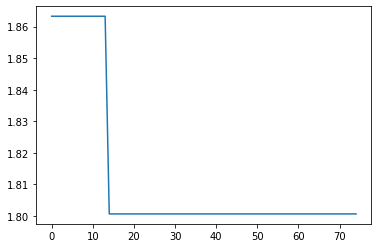

[0.14540776 0.40540716 0.37213354 0.5        0.01636952 0.03
 0.02840913 0.01437397 0.9        0.53068233 1.17493845 0.2
 0.11742994 0.04057212] 1.8006697521098851
percent particles surviving (x,y): 7.0, 6.1
[0.14540776 0.40540716 0.37213354 0.5        0.01636952 0.03
 0.02840913 0.01437397 0.9        0.53068233 1.17493845 0.2
 0.11742994 0.04057212] 1.8006697521098851
done
Total time 1 minutes and 45 seconds


In [6]:
minimizer=Minimizer(PLS)
minimizer.find_Global_Min(mut=1,popPerDim=40,iterations=100,strategy='best/1')

[0.1454 0.4054 0.3721 0.5    0.0164 0.03   0.0284 0.0144 0.9    0.5307
 1.1749]


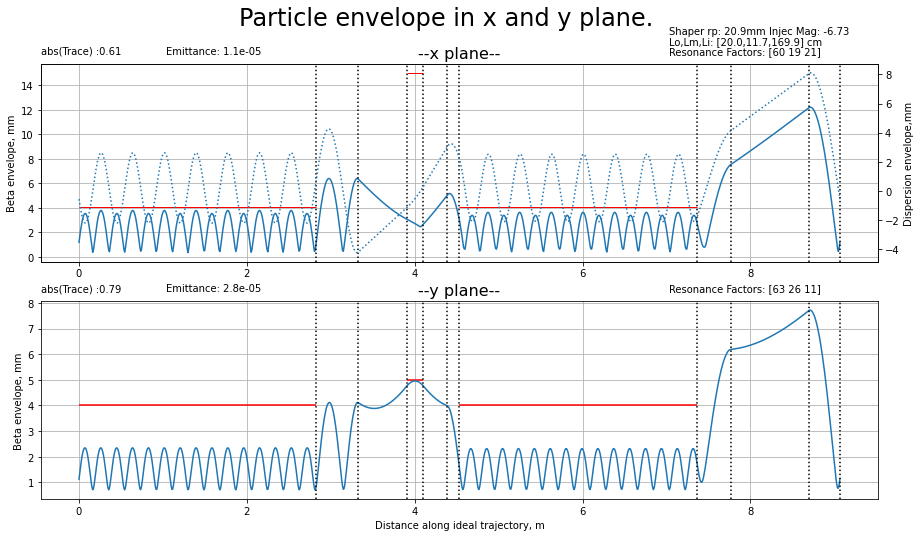

In [7]:
plotter=Plotter(PLS)
plotter.plot(sol=minimizer.sol)

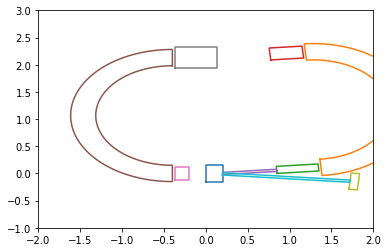

4.0

In [4]:
floorPlan=FloorPlan(PLS)
floorPlan.show_Floor_Plan(sol=minimizer.sol)
floorPlan.calculate_Cost()

In [5]:
args=[0.01    ,   0.5   ,     0.45354926 ,0.15293024 ,0.02158133 ,0.03,
 0.02859317 ,0.01640303, 0.96829063, 0.5     ,   1.06678003 ,0.18716899,
 0.11065167, 0.03274518]
totalLengthList=PLS.totalLengthListFunc(*args[:-3])
envList,emittanceArrList=minimizer.make_Envelope_And_Emittance_List(args,totalLengthList)
minimizer.find_Clipped_Particles(totalLengthList,args[:-3], envList)

(311, 176)